In [1]:
#1 - importar as bibliotecas
#pandas -> vou transformar a tabela
import pandas as pd
#matplotlib -> para plotar o gráfico
import matplotlib.pyplot as plt

In [2]:
#2 -  Ler o arquivo .csv
df = pd.read_csv('IEA Global EV Data 2024.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [3]:
#3 - apresentar informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [4]:
print(df.shape[0])#verificar quantidade de linhas totais na tabela
df.isnull().sum()#verifica se tem linhas vazias e conta a quantidade
df.duplicated().sum() # somas as linhas duplicadas da tabela

12654


0

In [5]:
df.columns
df.columns = ['Região', 'Categoria', 'Parâmetro', 'Tipo','Trem de Força','Ano','Unidade','Valor']
df.columns

Index(['Região', 'Categoria', 'Parâmetro', 'Tipo', 'Trem de Força', 'Ano',
       'Unidade', 'Valor'],
      dtype='object')

In [6]:
#visualizar os valores numa coluna
df['Unidade'].unique()

array(['percent', 'Vehicles', 'charging points', 'GWh',
       'Milion barrels per day', 'Oil displacement, million lge'],
      dtype=object)

In [7]:
#TRADANDO OS DADOS PARA TRABALAHAR COM ELES

#criando um dataframe para selecionar apenas veiculos
df_vehicles = df.loc[df['Unidade'] == 'Vehicles']

df_vehicles['Unidade'].unique()


#excluindo valores

# Textos específicos para remover
#textos_especificos = ['percent', 'charging points']

# padrão de expressão regular para os textos específicos
#padrão = '|'.join(textos_especificos)
#percent = 'percent'
#charging_points = 'charging points'
#df_filtrado = df[~df['Unidade'].str.contains(padrão, case=False, na=False)]
#df_filtrado.head(80)
#df = df_filtrado
#df.info()
#df_filtrado = df[~df['Unidade'].str.contains(charging_points, case=False, na=False)]
#df_filtrado.head(80)

array(['Vehicles'], dtype=object)

In [8]:
df_vehicles['Tipo'].value_counts()

Tipo
Cars      2975
Buses     1485
Vans      1449
Trucks     933
Name: count, dtype: int64

In [22]:
print(df_vehicles.shape[0])
#print(len(valores_etiquetas))
#print(len(etiquetas))

6842


In [50]:
#plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna Tipo).
conta_tipo = df.groupby('Tipo')['Valor'].sum()
conta_tipo = df['Tipo'].value_counts()
print (conta_tipo)

etiquetas = df_vehicles['Tipo'].unique()
valores_etiquetas = df_vehicles['Tipo'].value_counts()

Tipo
Cars      4706
Buses     2696
Vans      2568
Trucks    1766
EV         918
Name: count, dtype: int64


In [52]:
print(len(valores_etiquetas))
print(len(etiquetas))

4
4


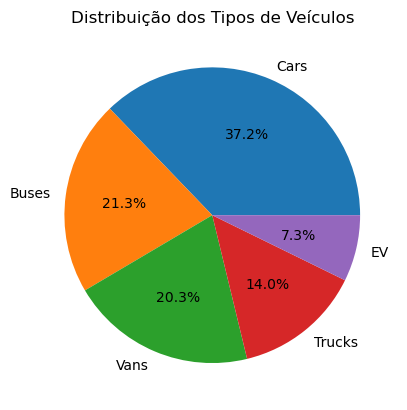

In [14]:
# gráfico de pizza
plt.pie(conta_tipo, labels=conta_tipo.index, autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Veículos')
plt.show()

In [56]:

df_vehicles['Valor'].dtype

#df_vehicles.groupby('Região')['Valor'].sum()
#conta_reg = df['Região'].value_counts()
#print (conta_reg)


dtype('float64')

In [118]:
# número de veículos por região
df_conta = df_vehicles.groupby('Região')['Valor'].sum().reset_index(name='Total_valor')


#df_ordena = df_conta.sort_values(by='Total_valor', ascending=False)
df_conta = df_ordena.loc[(df_ordena['Região'] != 'World') & (df_ordena['Região'] != 'Rest of the world')].sort_values(by='Total_valor', ascending=False)
#print (len(df_ordena))

# 10 principais regiões
top_10 = df_conta.head(10)
print (top_10)

            Região   Total_valor
7            China  1.148052e+09
16          Europe  5.937754e+08
48             USA  4.112801e+08
23           India  6.341878e+07
14            EU27  3.324256e+07
19         Germany  1.020111e+07
18          France  6.787772e+06
50  United Kingdom  6.283637e+06
35          Norway  4.793634e+06
27           Japan  3.603756e+06


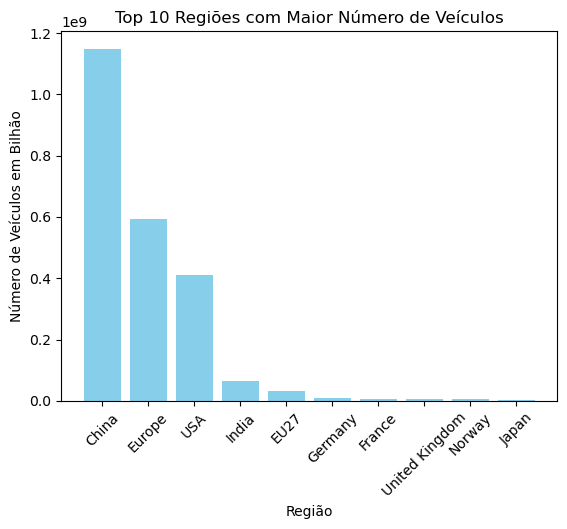

In [140]:
#gráfico de barras
x = top_10['Região']
y = top_10['Total_valor']
plt.bar(x,y, color='skyblue')
plt.xlabel('Região')
plt.ylabel('Número de Veículos em Bilhão')
plt.xticks(rotation=45)
plt.title('Top 10 Regiões com Maior Número de Veículos')
plt.show()

In [144]:
df_vehicles['Região'].unique()


array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Rest of the world', 'Romania',
       'Seychelles', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'Turkiye', 'United Arab Emirates',
       'United Kingdom', 'USA', 'World'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Carros Vendidos')

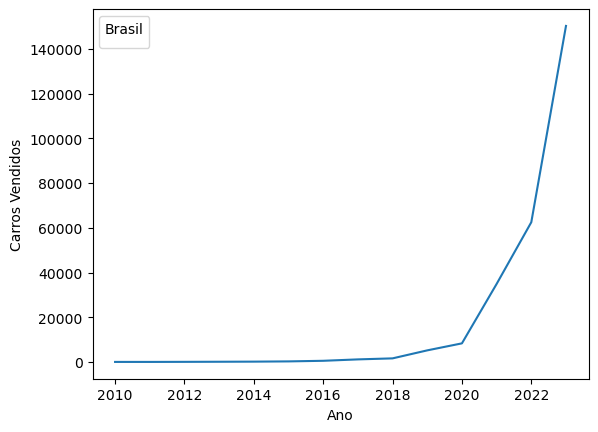

In [170]:
df_brazil = df_vehicles.loc[df_vehicles['Região'] == 'Brazil']

brasil = df_brazil.groupby('Ano')['Valor'].sum()


#x
#y = 
plt.plot(brasil)
plt.legend(title="Brasil")
plt.xlabel('Ano')
plt.ylabel('Carros Vendidos')

In [146]:
df_vehicles['Trem de Força'].unique()

array(['BEV', 'PHEV', 'FCEV'], dtype=object)

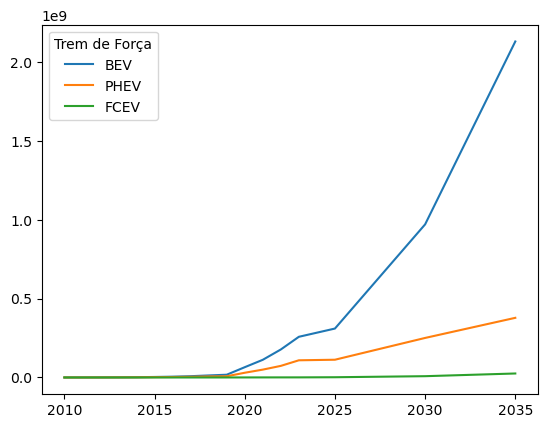

In [162]:
df_bev = df_vehicles.loc[df_vehicles['Trem de Força'] == 'BEV']
df_phev = df_vehicles.loc[df_vehicles['Trem de Força'] == 'PHEV']
df_fcev = df_vehicles.loc[df_vehicles['Trem de Força'] == 'FCEV']

bev = df_bev.groupby('Ano')['Valor'].sum()
phev = df_phev.groupby('Ano')['Valor'].sum()
fcev = df_fcev.groupby('Ano')['Valor'].sum()

plt.plot(bev, label='BEV')
plt.plot(phev, label='PHEV')
plt.plot(fcev, label='FCEV')
plt.legend(title='Trem de Força')